In [3]:
import os, sys
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas() # for progress_apply

from google.colab import drive
dir_path='/content/drive/MyDrive/Python Projects/lobbying-market'
if os.getcwd()!= dir_path:
  drive.mount('/content/drive')
  os.chdir(dir_path)
  print('directory changed to: '+ dir_path)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

Mounted at /content/drive
directory changed to: /content/drive/MyDrive/Python Projects/lobbying-market


In [4]:
os.getcwd()

'/content/drive/MyDrive/Python Projects/lobbying-market'

In [5]:
df=pd.read_pickle('data_processing/yfinance_stocks_scrape/data_with_mp.pkl')
df.head()

count  nan     income   expenses      total         end  \
ticker year quarter                                                            
MSFT   2013 1         23.0  0.0  1057500.0  2530000.0  3587500.0  2013-03-31   
            2         23.0  0.0   980000.0  2960000.0  3940000.0  2013-06-30   
            3         23.0  0.0   987000.0  2230000.0  3217000.0  2013-09-30   
            4         24.0  0.0  1070000.0  2770000.0  3840000.0  2013-12-31   
       2014 1         22.0  0.0   937000.0  2080000.0  3017000.0  2014-03-31   

                              val qtstr      sector                 industry  \
ticker year quarter                                                            
MSFT   2013 1        1.341050e+11    Q1  Technology  Software—Infrastructure   
            2        1.424310e+11    Q2  Technology  Software—Infrastructure   
            3        1.423480e+11    Q3  Technology  Software—Infrastructure   
            4        1.535430e+11    Q4  Technology  Software—Infrastructure   
       2014 1        1.561190e+11    Q1  Technology  Software—Infrastructure   

                     market_performance     ratio  income_ratio  \
ticker year quarter                                               
MSFT   2013 1                  9.003160  0.000022      0.000007   
            2                 -2.685392  0.000016      0.000007   
            3                  4.801041  0.000019      0.000008   
            4                  6.418435  0.000014      0.000006   
       2014 1                  3.987606  0.000015      0.000006   

                     expenses_ratio  total_ratio  
ticker year quarter                               
MSFT   2013 1              0.000022     0.000029  
            2              0.000016     0.000023  
            3              0.000019     0.000027  
            4              0.000014     0.000020  
       2014 1              0.000015     0.000021

In [ ]:
df['count'].groupby(level=0).size().value_counts()

count
44    605
41     48
43     44
42     35
40     32
37     19
39     18
36     14
35     13
31     11
32     11
38      8
33      8
34      4
28      1
Name: count, dtype: int64

In [7]:
tickers = df.index.get_level_values(0).unique()
print(tickers[:15])

Index(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'META', 'TSLA', 'COST', 'AMD',
       'NFLX', 'PEP', 'ADBE', 'CSCO', 'TMUS', 'QCOM'],
      dtype='object', name='ticker')


In [8]:
#Make all tickers have all 44 quarters
complete_multiindex= pd.MultiIndex.from_product([tickers,range(2013,2024),range(1,5)],names=['ticker','year', 'quarter'])
index_df= pd.DataFrame(index=complete_multiindex)
df=index_df.merge(df, left_index=True, right_index=True,how='outer')

In [9]:
df['count'].groupby(level=0).size().value_counts()

count
44    871
Name: count, dtype: int64

In [10]:
df.loc['MCFT',:,:].head(10)

count  nan   income  expenses    total         end         val  \
year quarter                                                                   
2013 1          NaN  NaN      NaN       NaN      NaN         NaN         NaN   
     2          NaN  NaN      NaN       NaN      NaN         NaN         NaN   
     3          NaN  NaN      NaN       NaN      NaN         NaN         NaN   
     4          NaN  NaN      NaN       NaN      NaN         NaN         NaN   
2014 1          NaN  NaN      NaN       NaN      NaN         NaN         NaN   
     2          NaN  NaN      NaN       NaN      NaN         NaN         NaN   
     3          NaN  NaN      NaN       NaN      NaN         NaN         NaN   
     4          NaN  NaN      NaN       NaN      NaN         NaN         NaN   
2015 1          NaN  NaN      NaN       NaN      NaN         NaN         NaN   
     2          1.0  0.0  70000.0       0.0  70000.0  2015-06-30  89676000.0   

             qtstr             sector               industry  \
year quarter                                                   
2013 1         NaN                NaN                    NaN   
     2         NaN                NaN                    NaN   
     3         NaN                NaN                    NaN   
     4         NaN                NaN                    NaN   
2014 1         NaN                NaN                    NaN   
     2         NaN                NaN                    NaN   
     3         NaN                NaN                    NaN   
     4         NaN                NaN                    NaN   
2015 1         NaN                NaN                    NaN   
     2          Q2  Consumer Cyclical  Recreational Vehicles   

              market_performance  ratio  income_ratio  expenses_ratio  \
year quarter                                                            
2013 1                       NaN    NaN           NaN             NaN   
     2                       NaN    NaN           NaN             NaN   
     3                       NaN    NaN           NaN             NaN   
     4                       NaN    NaN           NaN             NaN   
2014 1                       NaN    NaN           NaN             NaN   
     2                       NaN    NaN           NaN             NaN   
     3                       NaN    NaN           NaN             NaN   
     4                       NaN    NaN           NaN             NaN   
2015 1                       NaN    NaN           NaN             NaN   
     2                -11.759542    0.0      0.000781             0.0   

              total_ratio  
year quarter               
2013 1                NaN  
     2                NaN  
     3                NaN  
     4                NaN  
2014 1                NaN  
     2                NaN  
     3                NaN  
     4                NaN  
2015 1                NaN  
     2           0.000781

In [11]:
key='GOOGL'
corr_df=df[['income_ratio','expenses_ratio','total_ratio', 'market_performance']].loc[key,:,:].corr()
corr_df['ticker']=key
corr_df.set_index('ticker',inplace=True)
corr_df.iloc[[3]]

,income_ratio,expenses_ratio,total_ratio,market_performance
ticker,,,,
GOOGL,-0.167338,-0.18946,-0.18749,1.0


In [12]:
all_corr_df=pd.DataFrame(columns=['income_ratio','expenses_ratio','total_ratio', 'market_performance'])
for key in tickers:
    corr_df=df[['income_ratio','expenses_ratio','total_ratio', 'market_performance']].loc[key,:,:].corr()
    corr_df['ticker']=key
    corr_df.set_index('ticker',inplace=True)
    aux_row=corr_df.iloc[[3]]
    all_corr_df=pd.concat([all_corr_df,aux_row])

In [13]:
all_corr_df.head()

,income_ratio,expenses_ratio,total_ratio,market_performance
MSFT,0.043363,-0.032453,-0.012117,1.0
AAPL,0.024103,0.226390,0.190389,1.0
NVDA,0.326888,NaN,0.326888,1.0
AMZN,0.156252,0.342212,0.318173,1.0
GOOGL,-0.167338,-0.189460,-0.187490,1.0


In [14]:
sp500_quarters=pd.read_pickle('data_processing/yfinance_stocks_scrape/sp500_quarters.pkl')

In [15]:
big_multiindex=sp500_quarters.index
big_multiindex

MultiIndex([(2013, 1),
            (2013, 2),
            (2013, 3),
            (2013, 4),
            (2014, 1),
            (2014, 2),
            (2014, 3),
            (2014, 4),
            (2015, 1),
            (2015, 2),
            (2015, 3),
            (2015, 4),
            (2016, 1),
            (2016, 2),
            (2016, 3),
            (2016, 4),
            (2017, 1),
            (2017, 2),
            (2017, 3),
            (2017, 4),
            (2018, 1),
            (2018, 2),
            (2018, 3),
            (2018, 4),
            (2019, 1),
            (2019, 2),
            (2019, 3),
            (2019, 4),
            (2020, 1),
            (2020, 2),
            (2020, 3),
            (2020, 4),
            (2021, 1),
            (2021, 2),
            (2021, 3),
            (2021, 4),
            (2022, 1),
            (2022, 2),
            (2022, 3),
            (2022, 4),
            (2023, 1),
            (2023, 2),
            (2023, 3),
           

In [16]:
sp500_quarters

avg_change
year quarter            
2013 1          3.029197
     2          3.714249
     3          4.346156
     4          0.157817
2014 1          0.787723
     2          0.131158
     3          3.246616
     4          0.266732
2015 1          2.045896
     2         -2.417418
     3          6.679000
     4         -3.052434
2016 1          0.113441
     2          2.810667
     3          1.095623
     4          3.016074
2017 1          1.658902
     2          1.571200
     3          2.932134
     4          1.397230
2018 1          4.696243
     2          4.506951
     3         -7.716065
     4          8.405254
2019 1          0.527967
     2         -0.219060
     3          4.846718
     4         -6.199822
2020 1         18.667701
     2          6.546313
     3          5.137868
     4          4.460216
2021 1          4.073670
     2          2.352996
     3          5.624664
     4         -6.936316
2022 1         -9.683377
     2          4.052488
     3          4.717871
     4          4.600371
2023 1          1.977523
     2          0.057178
     3          4.116171
     4          5.265019
2024 1         -2.078313
     2               NaN
     3               NaN
     4               NaN
2025 1               NaN
     2               NaN
     3               NaN
     4               NaN
2026 1               NaN
     2               NaN
     3               NaN
     4               NaN
2027 1               NaN
     2               NaN
     3               NaN
     4               NaN

In [17]:
def get_shifted_sp500( d):
  aux=sp500_quarters.shift(periods=-d)[:44]
  return aux

def correlation_with_sp500 (df, d):
  aux=get_shifted_sp500(d)
  return df.corrwith(aux['avg_change'], axis=0, numeric_only=True)


def get_shifted_mp(df, d):
  aux=pd.DataFrame(index=big_multiindex)
  aux=aux.merge(df, left_index=True, right_index=True)
  aux=aux.shift(periods=-d)[:44]
  return aux

def correlation_with_mp (df, d):
  aux=get_shifted_mp(df,d)
  return df.corrwith(aux['market_performance'], axis=0, numeric_only=True)


In [18]:
correlation0= df.groupby(level=0)
correlation0=correlation0.apply(lambda x: correlation_with_sp500 (x, 0))

In [19]:
correlation0.describe()

,count,nan,income,expenses,total,val,market_performance,ratio,income_ratio,expenses_ratio,total_ratio
count,857.000000,487.000000,836.000000,292.000000,848.000000,871.000000,871.000000,291.000000,829.000000,291.000000,840.000000
mean,0.014013,0.010891,0.013607,0.002728,0.012675,0.019514,0.057895,-0.017483,0.013284,-0.017483,0.009664
std,0.128463,0.146696,0.132664,0.118305,0.131470,0.098267,0.235874,0.113610,0.134486,0.113610,0.132326
min,-0.504432,-0.504432,-0.504432,-0.340126,-0.504432,-0.327339,-0.737075,-0.395752,-0.378843,-0.395752,-0.393121
25%,-0.071003,-0.069764,-0.072578,-0.081100,-0.074730,-0.038005,-0.098025,-0.097304,-0.078020,-0.097304,-0.079654
50%,0.012519,0.006807,0.010154,0.017045,0.009027,0.040844,0.078608,-0.020274,0.000859,-0.020274,-0.002000
75%,0.100546,0.088098,0.096622,0.088383,0.098518,0.084180,0.212953,0.052292,0.078539,0.052292,0.078280
max,0.551162,0.571921,0.551162,0.398152,0.551162,0.455970,0.658884,0.350197,0.578142,0.350197,0.578142


In [20]:
correlation_sp_list=[]
for i in range(10):
  corr=df.groupby(level=0).apply(lambda x: correlation_with_sp500 (x, i))
  correlation_sp_list.append(corr)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib

In [22]:
correlation_sp_list[5]

,count,nan,income,expenses,total,val,market_performance,ratio,income_ratio,expenses_ratio,total_ratio
ticker,,,,,,,,,,,
AADI,0.051863,NaN,0.126993,NaN,0.126993,0.064095,-0.290054,NaN,0.041804,NaN,0.041804
AAL,0.018587,0.028435,0.222661,0.054939,0.102742,0.144865,-0.299344,-0.060413,-0.073342,-0.060413,-0.068870
AAME,-0.185492,NaN,-0.161982,NaN,-0.161982,0.011071,-0.447861,NaN,-0.088282,NaN,-0.088282
AAON,0.004803,-0.180799,0.065319,-0.035848,-0.014955,-0.010604,0.116059,0.023688,0.018305,0.023688,0.024565
AAPL,-0.068196,-0.029529,-0.081657,-0.017917,-0.032653,0.110421,0.229781,0.172048,-0.099817,0.172048,0.112922
...,...,...,...,...,...,...,...,...,...,...,...
ZBRA,0.135320,0.202614,0.094761,0.169448,0.195191,0.036896,-0.233089,0.350807,-0.072444,0.350807,0.128234
ZD,0.051118,0.074132,-0.071715,0.025097,0.019224,0.018059,-0.129355,-0.163188,-0.041820,-0.163188,-0.153559
ZG,-0.093544,NaN,-0.147136,0.022286,0.008901,-0.021800,0.105214,0.369303,-0.139500,0.369303,0.340112


In [23]:
df.loc['AAL',:,:]

count  nan     income   expenses      total         end  \
year quarter                                                            
2013 1         15.0  0.0   780000.0  1270000.0  2050000.0  2013-03-31   
     2         15.0  0.0   745000.0  1080000.0  1825000.0  2013-06-30   
     3         16.0  0.0   750000.0  1040000.0  1790000.0  2013-09-30   
     4         14.0  0.0   762000.0  1040000.0  1802000.0  2013-12-31   
2014 1         13.0  0.0   662000.0  1500000.0  2162000.0  2014-03-31   
     2         15.0  0.0   632500.0  1320000.0  1952500.0  2014-06-30   
     3         16.0  0.0   711875.0  1170000.0  1881875.0  2014-09-30   
     4         17.0  0.0   711000.0  1500000.0  2211000.0  2014-12-31   
2015 1         16.0  0.0   681000.0  2090000.0  2771000.0  2015-03-31   
     2         17.0  0.0   716000.0  1680000.0  2396000.0  2015-06-30   
     3         17.0  0.0   741000.0  1540000.0  2281000.0  2015-09-30   
     4         15.0  0.0   727500.0  1190000.0  1917500.0  2015-12-31   
2016 1         16.0  0.0   757500.0  1790000.0  2547500.0  2016-03-31   
     2         17.0  1.0   787500.0  2140000.0  2927500.0  2016-06-30   
     3         14.0  0.0   800000.0  1930000.0  2730000.0  2016-09-30   
     4         15.0  0.0   815000.0  1950000.0  2765000.0  2016-12-31   
2017 1         16.0  0.0  1010000.0  1850000.0  2860000.0  2017-03-31   
     2         16.0  0.0   941000.0  1810000.0  2751000.0  2017-06-30   
     3         17.0  0.0   968500.0  1423000.0  2391500.0  2017-09-30   
     4         15.0  0.0   853500.0  1750000.0  2603500.0  2017-12-31   
2018 1         14.0  0.0   813500.0  1420000.0  2233500.0  2018-03-31   
     2         14.0  0.0   813500.0  1370000.0  2183500.0  2018-06-30   
     3         14.0  0.0   826000.0  1400000.0  2226000.0  2018-09-30   
     4         13.0  0.0   836000.0  1400000.0  2236000.0  2018-12-31   
2019 1         14.0  0.0   845000.0  1330000.0  2175000.0  2019-03-31   
     2         13.0  0.0   842500.0  1420000.0  2262500.0  2019-06-30   
     3         12.0  0.0   777500.0  1290000.0  2067500.0  2019-09-30   
     4         13.0  0.0   827000.0  1290000.0  2117000.0  2019-12-31   
2020 1         12.0  0.0   710000.0  1410000.0  2120000.0  2020-03-31   
     2         11.0  0.0   644000.0  1080000.0  1724000.0  2020-06-30   
     3         11.0  0.0   524000.0   870000.0  1394000.0  2020-09-30   
     4         11.0  0.0   700000.0  1060000.0  1760000.0  2020-12-31   
2021 1         11.0  0.0   680000.0  1040000.0  1720000.0  2021-03-31   
     2         12.0  0.0   727500.0  1100000.0  1827500.0  2021-06-30   
     3         12.0  0.0   685000.0  1100000.0  1785000.0  2021-09-30   
     4         12.0  0.0   710000.0  1140000.0  1850000.0  2021-12-31   
2022 1         12.0  0.0   700000.0  1490000.0  2190000.0  2022-03-31   
     2         12.0  0.0   705000.0  1090000.0  1795000.0  2022-06-30   
     3         12.0  0.0   720000.0  1170000.0  1890000.0  2022-09-30   
     4         12.0  0.0   720000.0  1170000.0  1890000.0  2022-12-31   
2023 1         13.0  0.0   745000.0  1160000.0  1905000.0  2023-03-31   
     2         14.0  1.0   765000.0  1150000.0  1915000.0  2023-06-30   
     3         14.0  0.0   815000.0  1150000.0  1965000.0  2023-09-30   
     4         14.0  0.0   830000.0  1140000.0  1970000.0  2023-12-31   

                       val qtstr       sector  industry  market_performance  \
year quarter                                                                  
2013 1        2.385200e+10    Q1  Industrials  Airlines           -1.036526   
     2        2.621600e+10    Q2  Industrials  Airlines           27.972070   
     3        2.678000e+10    Q3  Industrials  Airlines           64.625129   
     4        4.227800e+10    Q4  Industrials  Airlines           50.075996   
2014 1        4.373700e+10    Q1  Industrials  Airlines           -0.920150   
     2        4.481100e+10    Q2  Industrials  Airlines           -3.181681   
     3        4.417300e

In [24]:
for i in range(len(correlation_sp_list)):
  print('d='+str(i))
  print(correlation_sp_list[i][['total','total_ratio','market_performance']].describe())

d=0
            total  total_ratio  market_performance
count  848.000000   840.000000          871.000000
mean     0.012675     0.009664            0.057895
std      0.131470     0.132326            0.235874
min     -0.504432    -0.393121           -0.737075
25%     -0.074730    -0.079654           -0.098025
50%      0.009027    -0.002000            0.078608
75%      0.098518     0.078280            0.212953
max      0.551162     0.578142            0.658884
d=1
            total  total_ratio  market_performance
count  848.000000   840.000000          871.000000
mean     0.002359     0.009587            0.058267
std      0.119406     0.130534            0.163991
min     -0.497746    -0.505742           -0.606554
25%     -0.073108    -0.071657           -0.044201
50%      0.005397    -0.002929            0.055018
75%      0.077811     0.094729            0.160347
max      0.472078     0.593001            0.986842
d=2
            total  total_ratio  market_performance
count  841.000000  

In [26]:
for i in range(10):
  print('d='+str(i))
  print(correlation_sp_list[i].nlargest(10,'total_ratio')['total_ratio'])

d=0
ticker
SNDX     0.578142
PRPL     0.510183
FCNCA    0.509593
LIND     0.497467
AYTU     0.492642
COOP     0.488636
ATLC     0.481763
VANI     0.466083
HROW     0.460718
AVXL     0.452867
Name: total_ratio, dtype: float64
d=1
ticker
OPGN    0.593001
WLFC    0.559131
PSTV    0.552152
CDTX    0.547642
UCTT    0.523311
PTGX    0.519769
ORRF    0.484760
NSSC    0.475722
STRM    0.466811
LFCR    0.432655
Name: total_ratio, dtype: float64
d=2
ticker
ABAT    0.546502
MGNI    0.488812
TNDM    0.472211
AMSF    0.468384
MBWM    0.457283
NWL     0.451150
IPWR    0.390494
OCGN    0.341747
SYRE    0.339014
TTNP    0.323191
Name: total_ratio, dtype: float64
d=3
ticker
MXL     0.576388
STRS    0.540205
BRTX    0.444710
GOVX    0.385975
IPWR    0.375182
TTNP    0.355478
TTEK    0.353557
DMRC    0.350070
CACC    0.344373
OFLX    0.338658
Name: total_ratio, dtype: float64
d=4
ticker
ESCA    0.592738
NDSN    0.555381
VCEL    0.555381
CLMB    0.474211
SNCR    0.440532
UMBF    0.371271
NWL     0.369648


In [27]:
df.loc['PEBK',:,:]

count  nan   income  expenses    total         end  \
year quarter                                                       
2013 1          0.0  0.0      0.0       0.0      0.0  2013-03-31   
     2          0.0  0.0      0.0       0.0      0.0  2013-06-30   
     3          0.0  0.0      0.0       0.0      0.0  2013-09-30   
     4          0.0  0.0      0.0       0.0      0.0  2013-12-31   
2014 1          0.0  0.0      0.0       0.0      0.0  2014-03-31   
     2          0.0  0.0      0.0       0.0      0.0  2014-06-30   
     3          0.0  0.0      0.0       0.0      0.0  2014-09-30   
     4          0.0  0.0      0.0       0.0      0.0  2014-12-31   
2015 1          1.0  0.0  30000.0       0.0  30000.0  2015-03-31   
     2          1.0  0.0  30000.0       0.0  30000.0  2015-06-30   
     3          1.0  0.0  30000.0       0.0  30000.0  2015-09-30   
     4          1.0  0.0  30000.0       0.0  30000.0  2015-12-31   
2016 1          1.0  0.0  30000.0       0.0  30000.0  2016-03-31   
     2          1.0  0.0  30000.0       0.0  30000.0  2016-06-30   
     3          1.0  0.0  30000.0       0.0  30000.0  2016-09-30   
     4          1.0  0.0  30000.0       0.0  30000.0  2016-12-31   
2017 1          1.0  0.0  30000.0       0.0  30000.0  2017-03-31   
     2          0.0  0.0      0.0       0.0      0.0  2017-06-30   
     3          0.0  0.0      0.0       0.0      0.0  2017-09-30   
     4          0.0  0.0      0.0       0.0      0.0  2017-12-31   
2018 1          0.0  0.0      0.0       0.0      0.0  2018-03-31   
     2          1.0  0.0  10000.0       0.0  10000.0  2018-06-30   
     3          1.0  0.0  30000.0       0.0  30000.0  2018-09-30   
     4          1.0  0.0  30000.0       0.0  30000.0  2018-12-31   
2019 1          1.0  0.0  30000.0       0.0  30000.0  2019-03-31   
     2          1.0  0.0  30000.0       0.0  30000.0  2019-06-30   
     3          1.0  0.0  30000.0       0.0  30000.0  2019-09-30   
     4          1.0  0.0  30000.0       0.0  30000.0  2019-12-31   
2020 1          1.0  0.0  30000.0       0.0  30000.0  2020-03-31   
     2          1.0  0.0  30000.0       0.0  30000.0  2020-06-30   
     3          0.0  0.0      0.0       0.0      0.0  2020-09-30   
     4          0.0  0.0      0.0       0.0      0.0  2020-12-31   
2021 1          0.0  0.0      0.0       0.0      0.0  2021-03-31   
     2          0.0  0.0      0.0       0.0      0.0  2021-06-30   
     3          1.0  0.0  30000.0       0.0  30000.0  2021-09-30   
     4          1.0  0.0  50000.0       0.0  50000.0  2021-12-31   
2022 1          1.0  0.0  50000.0       0.0  50000.0  2022-03-31   
     2          1.0  0.0  50000.0       0.0  50000.0  2022-06-30   
     3          1.0  0.0  30000.0       0.0  30000.0  2022-09-30   
     4          1.0  0.0  30000.0       0.0  30000.0  2022-12-31   
2023 1          0.0  0.0      0.0       0.0      0.0  2023-03-31   
     2          0.0  0.0      0.0       0.0      0.0  2023-06-30   
     3          0.0  0.0      0.0       0.0      0.0  2023-09-30   
     4          0.0  0.0      0.0       0.0      0.0  2023-12-31   

                       val qtstr              sector        industry  \
year quarter                                                           
2013 1        1.018280e+09    Q1  Financial Services  Banks—Regional   
     2        1.028040e+09    Q2  Financial Services  Banks—Regional   
     3        1.042741e+09    Q3  Financial Services  Banks—Regional   
     4        1.034684e+09    Q4  Financial Services  Banks—Regional   
2014 1        1.038764e+09    Q1  Financial Services  Banks—Regional   
     2        1.047852e+09    Q2  Financial Services  Banks—Regional   
     3        1.053935e+09    Q3  Financial Services  Banks—Regional   
     4        1.040494e+09    Q4  Financial Services  Banks—Regional   
2015 1        1.049455e+09    Q1  Financial Services  Banks—Regional   
     2        1.037211e+09    Q2  Financial Services  Banks—Regional   
     3        1.03719

In [ ]:
aux=df.loc['MSFT',:,:]
correlation_with_mp(aux,1)

In [28]:
correlation_mp_list=[]
for i in range(10):
  corr=df.groupby(level=0).apply(lambda x: correlation_with_mp (x, i))
  correlation_mp_list.append(corr)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib

In [29]:
for i in range(len(correlation_mp_list)):
  print('d='+str(i))
  print(correlation_mp_list[i][['count','income_ratio','expenses_ratio','total_ratio']].describe())

d=0
            count  income_ratio  expenses_ratio  total_ratio
count  836.000000    819.000000      287.000000   831.000000
mean    -0.009597      0.020895        0.022831     0.024616
std      0.205759      0.221591        0.201235     0.217716
min     -0.772056     -0.703665       -0.489595    -0.703665
25%     -0.152255     -0.135570       -0.118754    -0.125020
50%     -0.011902      0.017882        0.023247     0.021804
75%      0.131583      0.157730        0.148446     0.157836
max      0.866689      0.824802        0.761693     0.824802
d=1
            count  income_ratio  expenses_ratio  total_ratio
count  834.000000    814.000000      281.000000   825.000000
mean    -0.008315      0.032264        0.020681     0.029712
std      0.198742      0.223796        0.201246     0.216201
min     -0.634214     -0.736008       -0.474971    -0.736008
25%     -0.142284     -0.125990       -0.124170    -0.120205
50%     -0.014432      0.020683        0.018050     0.016817
75%      0.11527

NameError: name 'correlation_list' is not defined

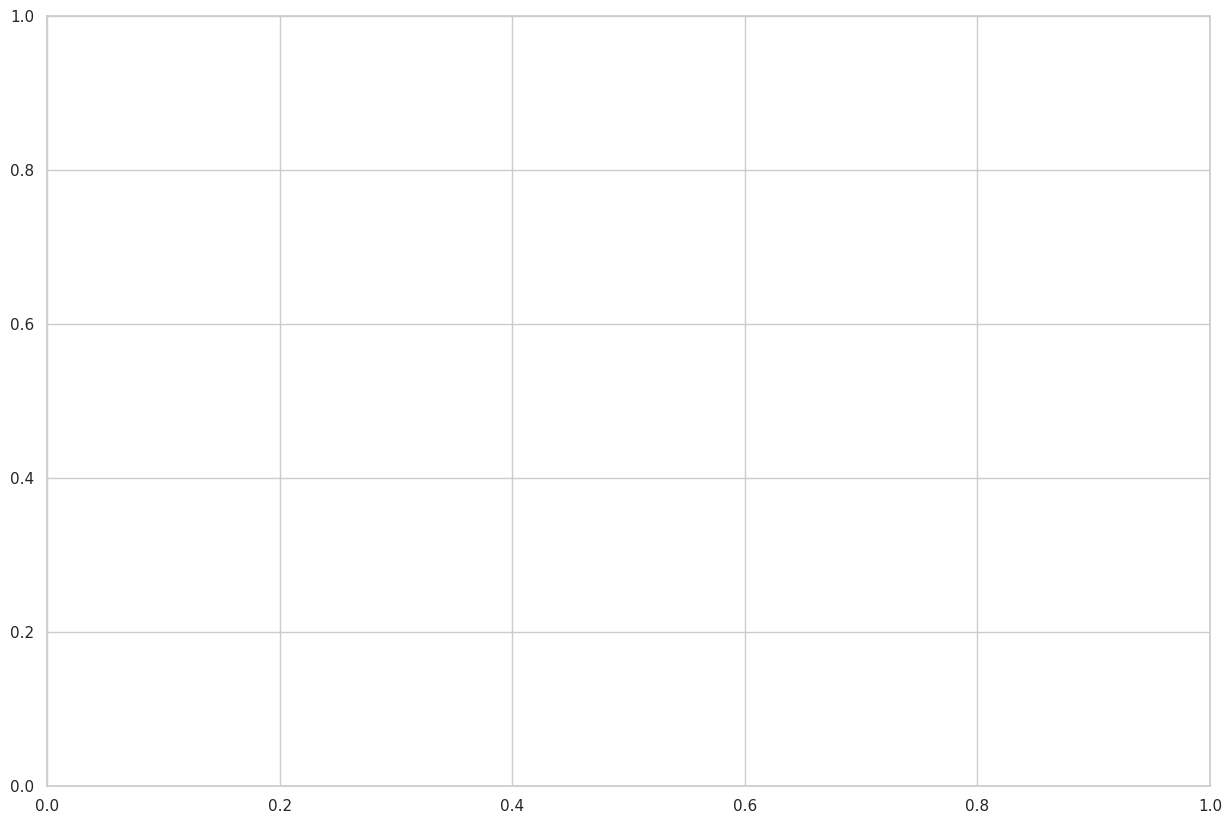

In [30]:
# prompt: graph from the means in the previous output

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(range(10), [x['total_ratio'].mean() for x in correlation_list])
ax.set_xlabel('d')
ax.set_ylabel('mean of total ratio correlation')
plt.show()


In [31]:
summary=pd.DataFrame()
for i in range(len(correlation_mp_list)):
  aux=correlation_mp_list[i][['count','income_ratio','expenses_ratio','total_ratio']].describe().loc[['mean']]
  aux['d']=i
  summary=pd.concat([summary,aux])

In [32]:
summary

,count,income_ratio,expenses_ratio,total_ratio,d
mean,-0.009597,0.020895,0.022831,0.024616,0
mean,-0.008315,0.032264,0.020681,0.029712,1
mean,-0.014637,0.027130,0.022930,0.028053,2
mean,-0.019570,0.018353,0.020559,0.022361,3
mean,-0.024896,0.010133,0.013839,0.014639,4
mean,-0.028550,0.006605,0.004610,0.007276,5
mean,-0.030058,0.009353,0.021620,0.013846,6
mean,-0.027487,-0.004994,0.029291,0.002333,7
mean,-0.017168,-0.001936,0.017098,-0.000419,8
mean,-0.010176,0.000472,0.022214,0.002432,9


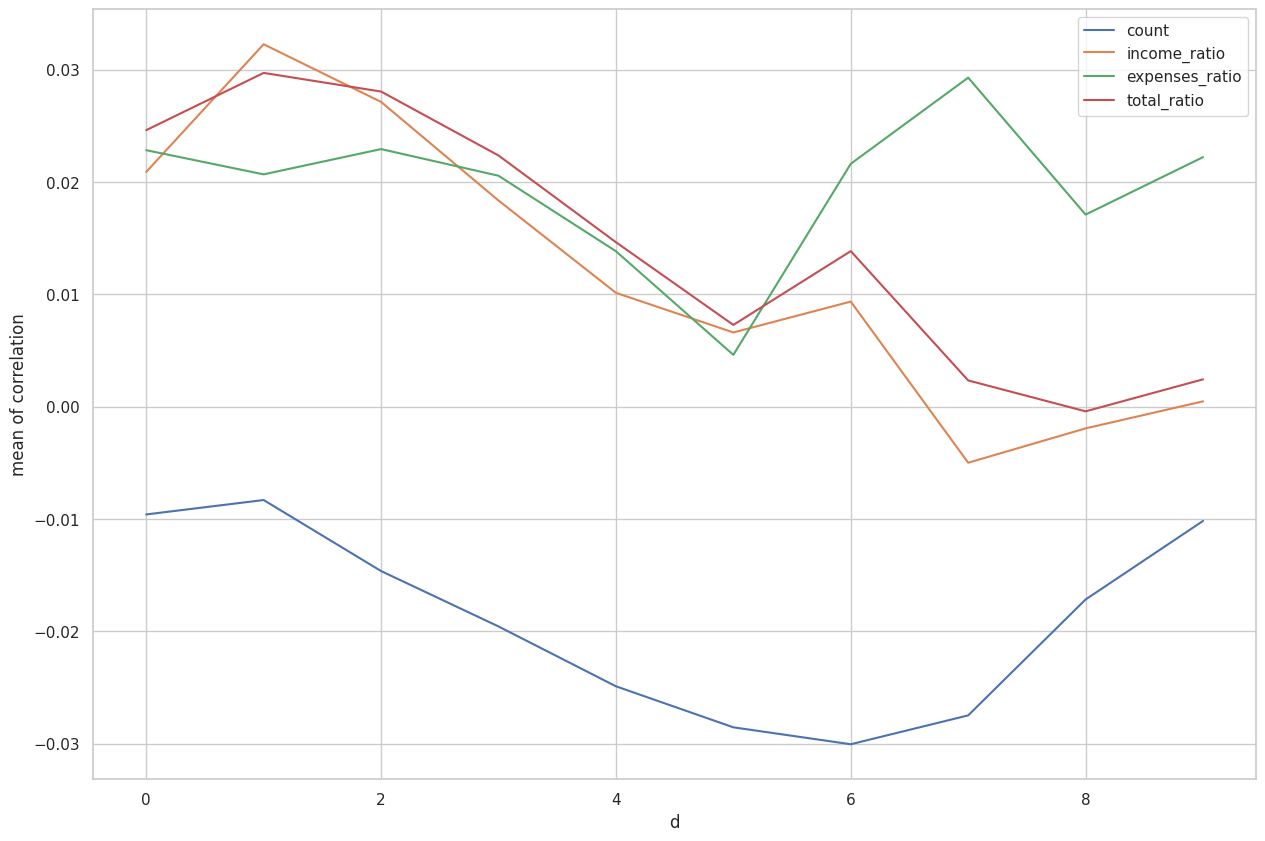

In [33]:
# prompt: plot 'd' vs all other variables in summary

fig, ax = plt.subplots(figsize=(15, 10))
for col in summary.columns[:-1]:
    ax.plot(summary['d'], summary[col], label=col)
ax.set_xlabel('d')
ax.set_ylabel('mean of correlation')
ax.legend()
plt.show()


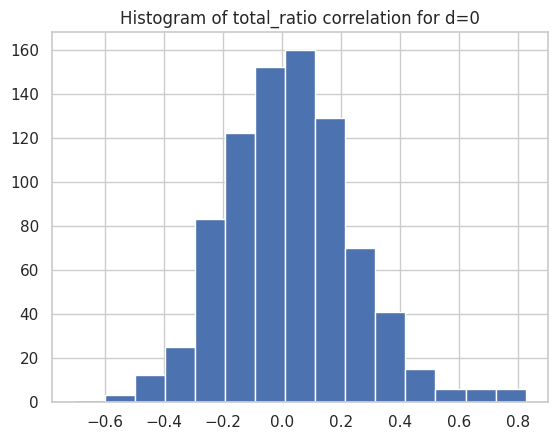

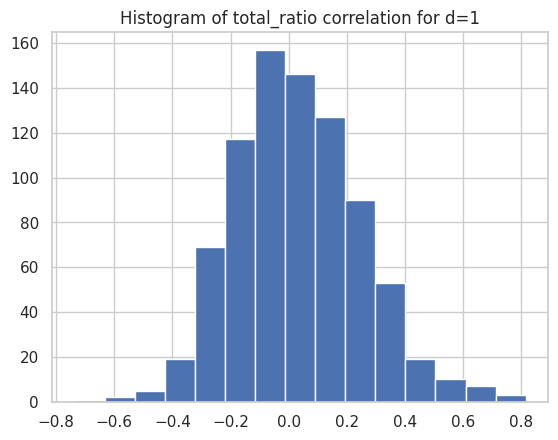

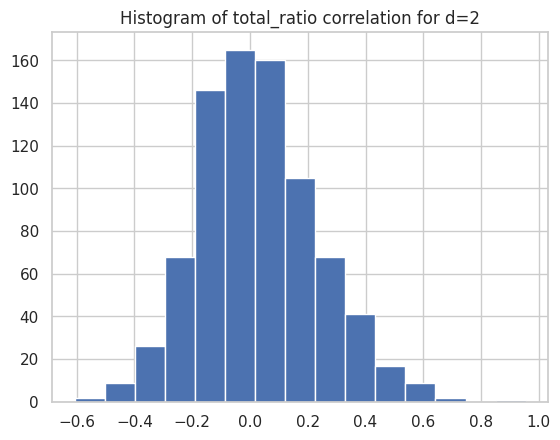

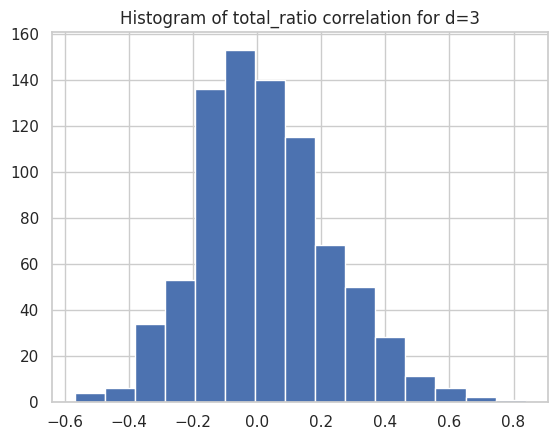

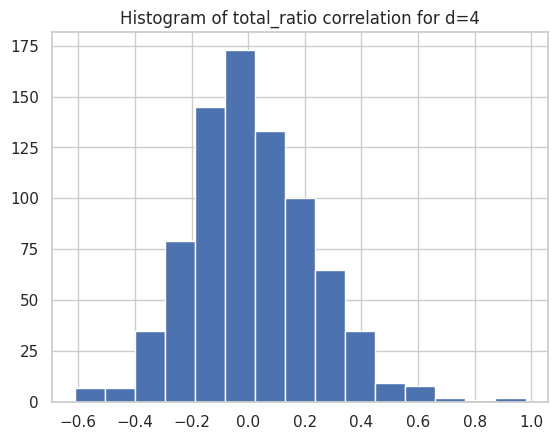

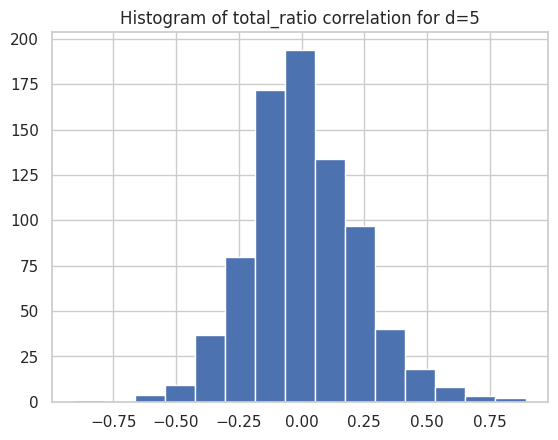

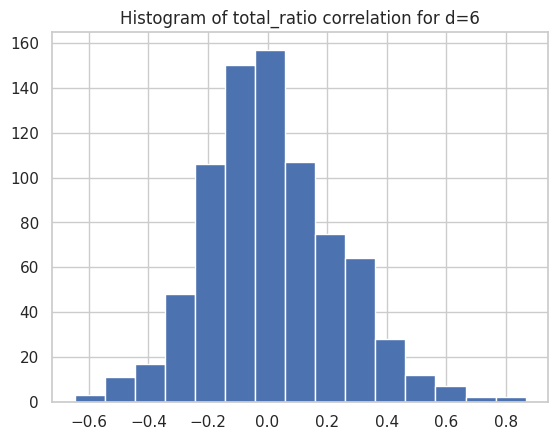

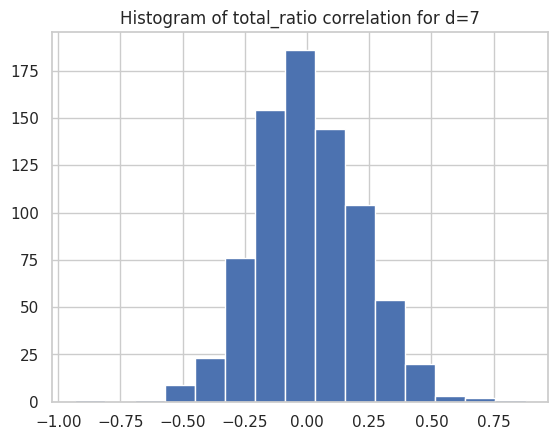

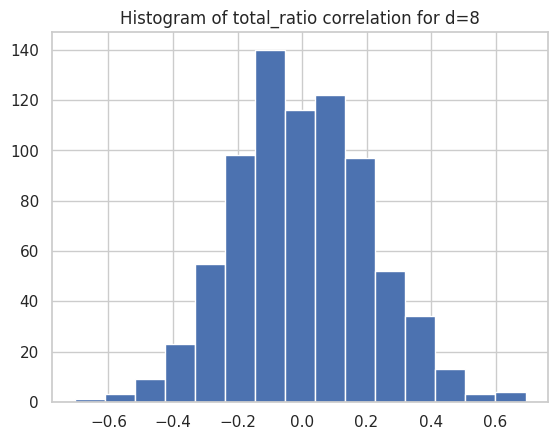

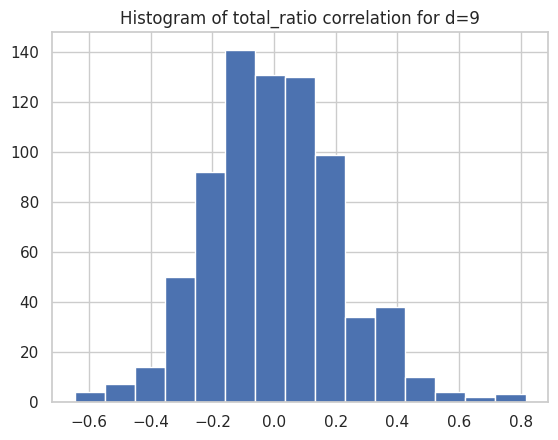

In [35]:
# prompt: make a histogram for correlation_mp_list[i]['total_ratio'] for each i

import matplotlib.pyplot as plt
for i in range(len(correlation_mp_list)):
    plt.figure()
    plt.hist(correlation_mp_list[i]['total_ratio'],bins=15)
    plt.title(f'Histogram of total_ratio correlation for d={i}')
    plt.show()
